# Integración numérica

In [11]:
import matplotlib.pyplot as plt
import numpy as np

La integración numérica de funciones es una manera de calcular en forma aproximada el valor de una integral. Hay varios métodos de integración numérica:

- Regla de Trapecios
- Regla de Simpson
- Cuadraturas

etc.

## Trapecios

La manera de aproximar una integral por el método de trapecios es dividir el dominio de la integral en sectores iguales, y aproximar la integral en cada uno por un trapecio.
Supongamos que tenemos que evaluar la integral:

$$ \int_0^{\pi} \sin(x)dx $$

cuyo resultado analítico es:
$$ \int_0^{\pi} \sin(x)dx = -\cos(x) \big|_0^{\pi} $$

$$ =-(\cos(\pi) - \cos(0)) $$

$$ = -(-1 - 1)$$

$$ =  2 $$



<div>
<img src="attachment:trap.png" width="300"/>
</div>


Si dividimos el dominio de $x$ en $x_0, x_1, \cdots, x_n$ el área de un trapecio de base $x_{k-1},x_k$ y alturas $f(x_{k-1})$ y $f(x_k)$ es 

$$
Area = \overbrace{\frac{f(x_{k-1}) + f(x_k)}{2}}^{altura\, promedio} \,\, \overbrace{\Delta x}^{base}
$$

Sumando sobre todos los sectores:

$$
\int_a^b f(x)dx \approx \frac{f(x_0) + f(x_1)}{2}\Delta x + \frac{f(x_1) + f(x_2)}{2}\Delta x + \cdots + \frac{f(x_{N-1}) + f(x_N)}{2}\Delta x
$$

O sea

$$
\int_a^b f(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1}) + f(x_k)}{2} \Delta x
$$


In [13]:
def trap(f, x):
    """
    computes the integral of f using trapezoid rule
    """
    area = 0
    N = len(x)
    dx = x[1] - x[0]
    
    for k in range(1, N):
        area += (f(x[k - 1]) + f(x[k])) * dx / 2
        
    return area

In [19]:
def f(x):
    return np.sin(x)


x = np.linspace(0, np.pi, 40)
# print(x)
trap(f, x)

1.9989184010578636

A continuación se ve cómo sería la aproximación

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams.update({'font.size': 19})

def f(x):
    return np.sin(x)

def trap_plot(n_points):
    x = np.linspace(0, np.pi, 1000)          # continuous
    x_i = np.linspace(0, np.pi, n_points)    # discrete

    plt.plot(x, f(x), label=r'$\sin(x)$')
    plt.plot(x_i, f(x_i), '-o', label=r'$Trap$ ({})'.format(n_points))
    plt.fill(x_i, f(x_i), color='C1', alpha=0.15)
    plt.vlines(x_i, 0, f(x_i), color='C1', linestyle=':')
    plt.xticks(x_i, [r'$x_{}$'.format(n) for n in range(n_points)])
    plt.yticks([0, 1], ['$0$', '$1$'])
    plt.legend(loc='best')
    plt.ylim(0, 1.05)
    plt.show()

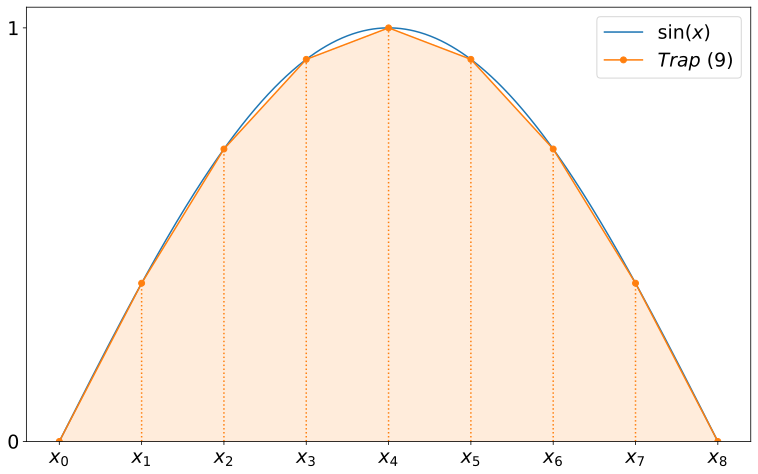

In [20]:
trap_plot(9)

También se puede calcular el error cuadrático medio  de la aproximación en función del número de puntos usado

In [21]:
plt.rcParams['figure.figsize'] = (11, 6)
def plot_error(n_points):
    for n in range(2, n_points):
        x = np.linspace(0, np.pi, n)
        plt.plot(n - 1, (trap(f, x) - 2) ** 2, 'bo')

        plt.axhline(0, color='black', lw=1)
        plt.xlabel('# de trapecios')
        plt.ylabel('error')
    plt.show()

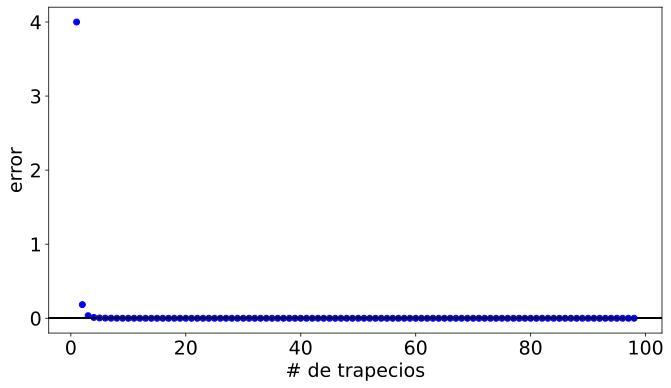

In [22]:
plot_error(100)

## Regla de Simpson

La regla de Simpson es similar a la de trapecios, aunque se utiliza una función cuadrática para aproximar la integral en la región $x_{k-1},x_k,x_{k+1}$

$$
\int_a^b f(x)dx \approx \frac{\Delta x}{3} \left\{ f(x_0) + 4 f(x_1) + 2 f(x_2) + 4 f(x_3) + \cdots + 4 f(x_{N-1}) + f(x_N) \right\}
$$

Notar que siempre se necesita un número impar de abscisas.

## Cuadraturas

La evaluación numérica de integrales por cuadraturas consiste en utilizar una suma pesada de la función evaluada en ciertas abscisas particulares, que se obtienen a partir de *polinomios ortogonales*. 

En general:

$$
\int_a^b f(x)dx \approx \sum_{k=1}^N w_k f(x_k)
$$

donde tanto los pesos $w_k$ como las abscisas $x_k$ vienen dadas en tablas (o funciones que las calculan). Afortunadamente, `scipy` viene en nuestro auxilio [con el módulo `integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html).

In [23]:
from scipy.integrate import quad

In [24]:
def f(x):
    return np.sin(x)

val, abserr = quad(f, 0, np.pi)
print("integral value =", val, ", absolute error =", abserr)

integral value = 2.0 , absolute error = 2.220446049250313e-14
